In [1]:
%load_ext lab_black

In [2]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [4]:
with open("data/raydium_trx.json") as f:
    df = pd.read_json(f)

In [5]:
start = pd.to_datetime(df.blockTime.min(), unit="s")
end = pd.to_datetime(df.blockTime.max(), unit="s")

In [6]:
start, end

(Timestamp('2022-02-14 05:17:40'), Timestamp('2022-02-15 00:59:25'))

In [7]:
with open("data/resultsRPCP.json") as f:
    df_results = pd.read_json(f)

### Total Opps

In [8]:
df_results.shape[0]

2766

### Opps Per Min

In [9]:
df_results.shape[0] / pd.Timedelta(end - start).seconds / 60

0.000650165714688668

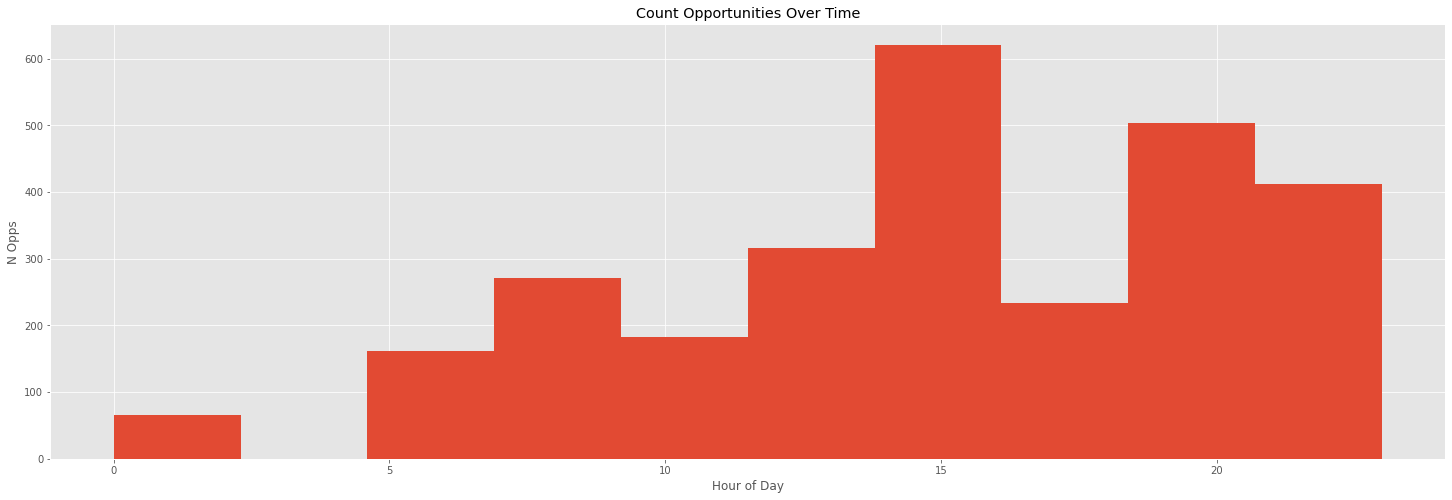

In [50]:
fig, ax = plt.subplots(figsize=(25, 8))
a = (pd.to_datetime(df_results.blockTime, unit="s")).dt.hour
a.hist()
ax.set_xlabel("Hour of Day")
ax.set_ylabel("N Opps")
ax.set_title("Count Opportunities Over Time")
pass

### Competition

In [11]:
df_results.owner.nunique()

38

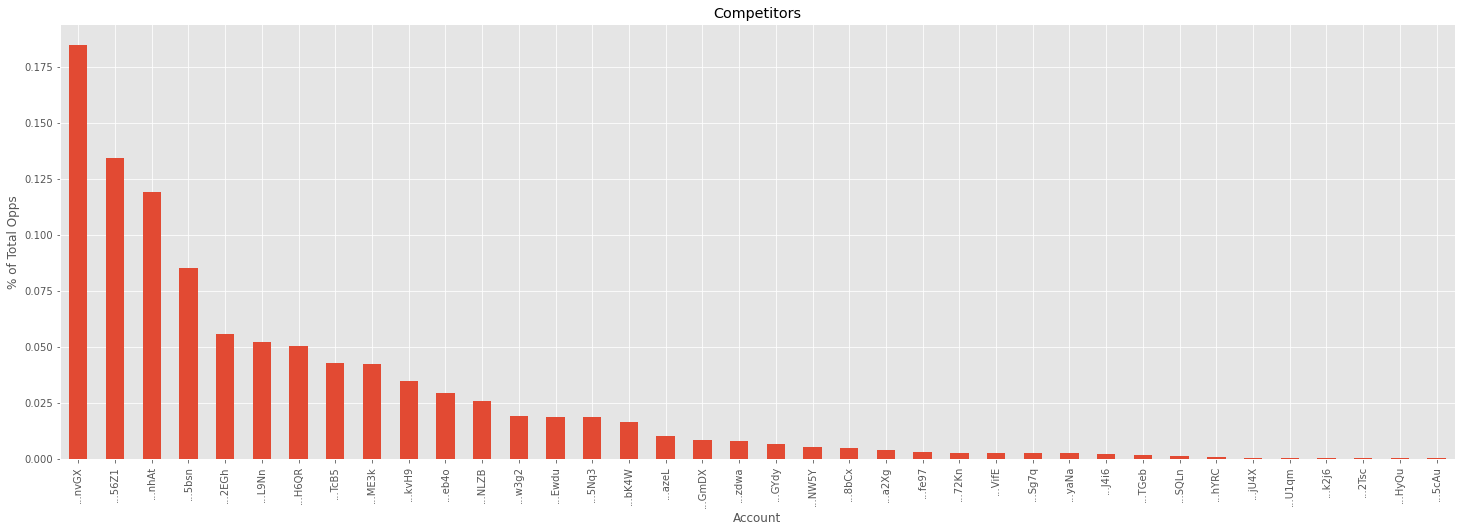

In [26]:
fig, ax = plt.subplots(figsize=(25, 8))

df_plot = (
    df_results.groupby("owner").size().sort_values(ascending=False)
    / df_results.shape[0]
)

stripped_names = list(df_plot.index)
stripped_names = ["..." + str(x[-4:]) for x in stripped_names]

df_plot.index = stripped_names

g = df_plot.plot(kind="bar")

ax.set_xlabel("Account")
ax.set_ylabel("% of Total Opps")

g.set_title("Competitors")
pass

In [13]:
df_results.groupby("owner").size().sort_values(ascending=False)

owner
AQ5xiESTtmYebNuQdAX14tb23PPFNUARDKui5ZKsnvGX    511
Gn35xm6fr3ByUJt9aC6ZSzSqzb15AyryhKQmZVoP56Z1    372
EDMGEpKKGKS7nxpu1gjLmuHHWAmvLNy3BZWDxNC3nhAt    329
9uAxqcxgGSn9Sft9FmshVoM8CZjmtY5K8d2TSGb75bsn    236
Lion6QppZ6x5VZaawuYUxdhJ7T8J8Hjf56vJB4G2EGh     154
J3xKkSUowia5q483zwQmijSfnVocGsWg6duFzQYHL9Nn    144
EDEG8c7wqLkyvGVLzHmckZcUFUjxkcHCUvGo58CzH6QR    139
JA6hRexXi9UjWpBqopis25A6SLnkWqPJ61mPm3UqTcB5    118
CsBGFujsus6Q1K7Leu7tprZcVVMSRDCFH1L6mxGqME3k    117
Ai5ZrhuwvDiLubv7gNpVS1v9qrKo5kxfARZGtKagkvH9     96
E6rRQBgWFxJZ1T6Rs66VwkArz6EeTqhX2ULEfCvSeb4o     82
HT4kx1ycd1iMYTVKN7mmFHoW67PkZNPiM1hTSaVYNLZB     72
Fsb16JMXAWLML5PTLKVh5Lg1xviVB6ah5p7YYcJEw3g2     53
AChUR4By6CZaZvYfBHAYyJfaC2Hami8trcfcjJcsEwdu     52
BossNYX1ELRTYZmxb6h2o86ktgrXTExdDymEDim65Nq3     52
6hyuGqKQyhAEipjtaquiNHfd1dVjrNT3FzzanXurbK4W     46
8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL     28
AasQTQH9oroodW5vi3uEoDuLyJDVfMz7GWehvisdGmDX     23
C7CkJM7aJspxT8gC6JHG8W5PXy7u1hR4DyBR7Y8Kzdwa     22
EFtvVd

In [27]:
mints = {}
non_usdc_count = 0

usd_profit = {}

for i, row in df_results.iterrows():
    if "EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v" in row["deltas"].keys():
        usd_profit[i] = row["deltas"]["EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v"]

        for k, v in row["deltas"].items():
            if k not in mints:
                mints[k] = 1
            else:
                mints[k] += 1
    else:
        non_usdc_count += 1
del mints["EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v"]

In [28]:
import string

In [29]:
usdc_pct = (df_results.shape[0] - non_usdc_count) / df_results.shape[0] * 100

print(
    f"{usdc_pct:0.2f}% of opportunities used USDC as the base of the arb. E.g.: USDC->TOKENX->USDC"
)

81.89% of opportunities used USDC as the base of the arb. E.g.: USDC->TOKENX->USDC


In [30]:
stripped_names = list(mints.keys())
stripped_names = ["..." + str(x[-4:]) for x in stripped_names]

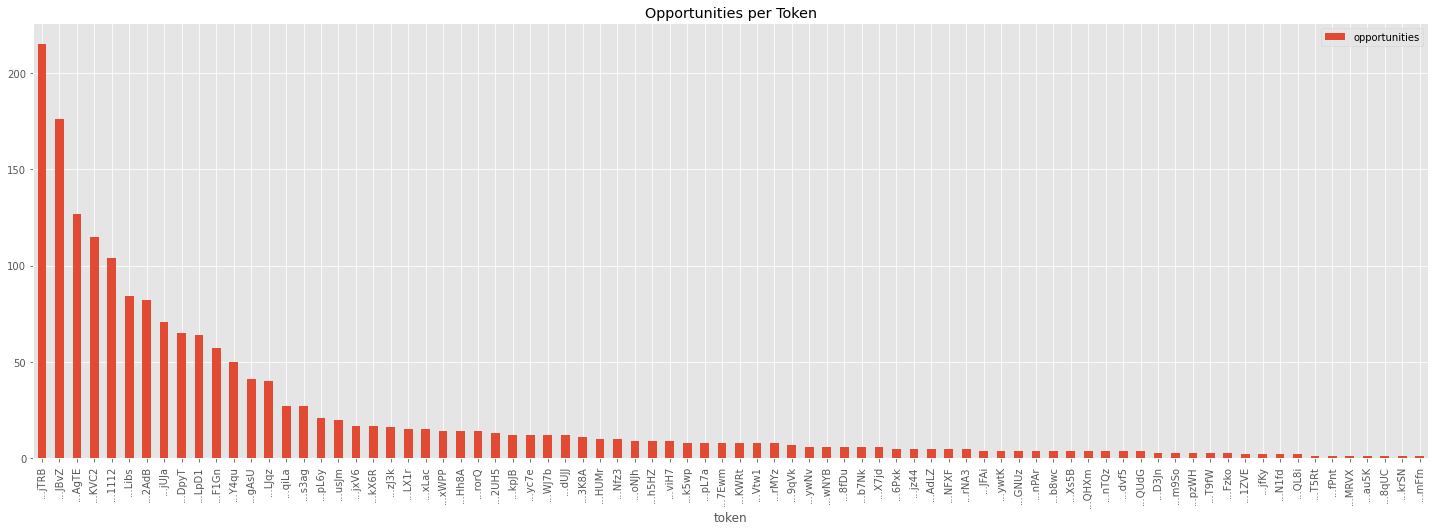

In [35]:
fig, ax = plt.subplots(figsize=(25, 8))
pd.DataFrame(data={"token": stripped_names, "opportunities": mints.values(),}).head(
    80
).set_index("token").sort_values("opportunities", ascending=False).plot(
    kind="bar", ax=ax
)

ax.set_title("Opportunities per Token")
pass

In [20]:
sum(list(usd_profit.values()))

5635.81501099998

/Applications/miniconda3/envs/mwz/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Opportunity Profit Dist')

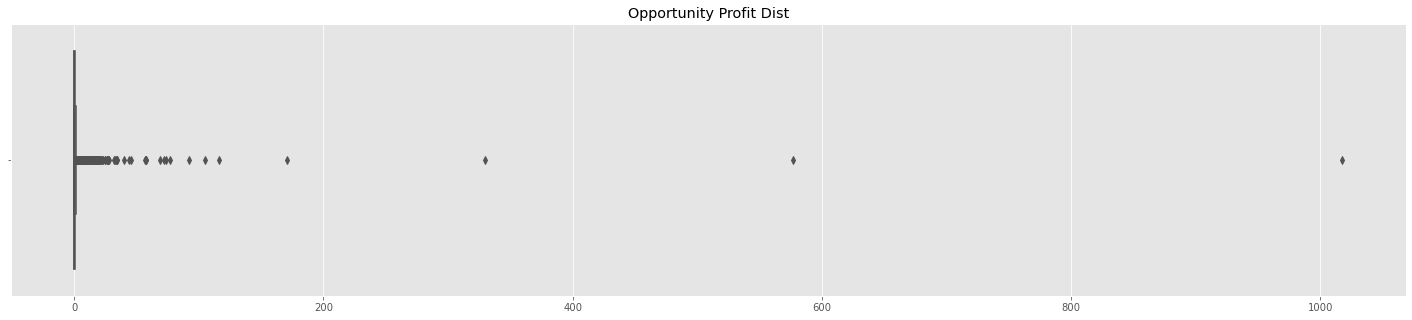

In [37]:

fig, ax = plt.subplots(figsize=(25, 5))
g = sns.boxplot(list(usd_profit.values()))

g.set_title("Opportunity Profit Dist")

<ipython-input-38-3c051e132068>:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale("log", nonposy="clip")


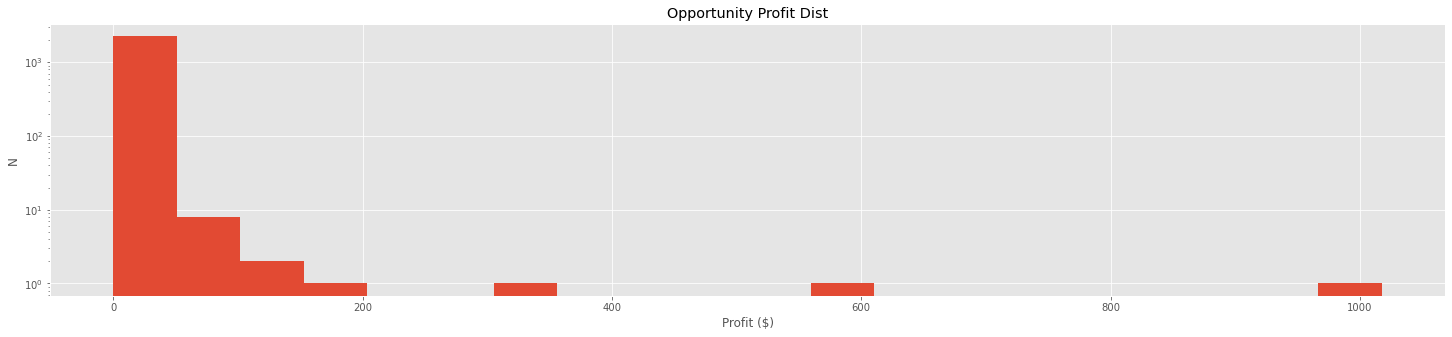

In [38]:
fig, ax = plt.subplots(figsize=(25, 5))
plt.hist(usd_profit.values(), bins=20)
plt.yscale("log", nonposy="clip")
ax.set_xlabel("Profit ($)")
ax.set_ylabel("N")
ax.set_title("Opportunity Profit Dist")
pass

/Applications/miniconda3/envs/mwz/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Opportunity Profit Dist (Outliers Hidden)')

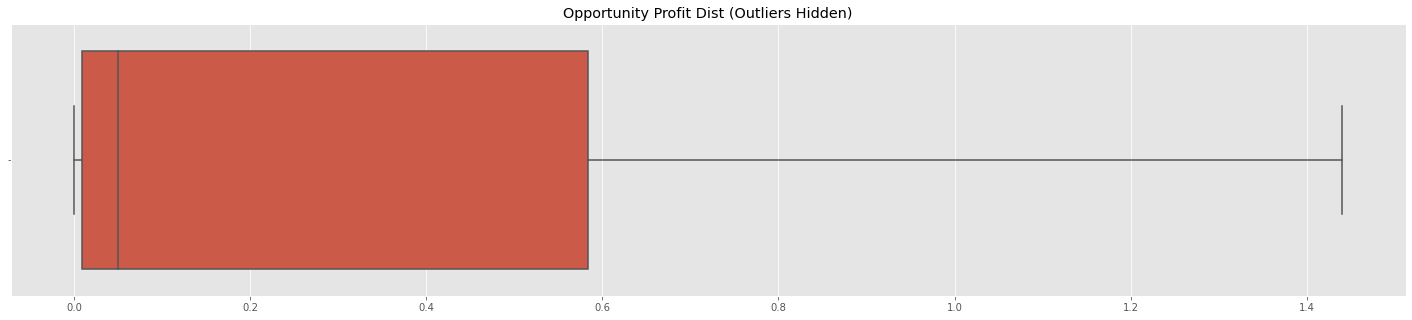

In [39]:
fig, ax = plt.subplots(figsize=(25, 5))

g = sns.boxplot(list(usd_profit.values()), showfliers=False)
g.set_title("Opportunity Profit Dist (Outliers Hidden)")

In [40]:
# Max Profit
df_results["usd_profit"] = df_results.index.map(usd_profit)
df_results["usd_profit"].max()

1017.52

In [41]:
df_results["usd_profit"].sum()

5635.81501099999

In [42]:
df_results["usd_profit"].median()

0.049558

In [43]:
df_results.sort_values("usd_profit", ascending=False).iloc[0].trxId

'3YQC5VHQssUNM7bKCSHNwKSVLPhwrhU8sjweHM7HBRA86JRR4vU7ZbeDsp5MvLCvbkxcSqht7oZ9peDuxZQmjXWG'

In [44]:
df_results["usd_profit"].mean()

2.488218547902865

In [45]:
df_results.loc[
    df_results.trxId
    == "2o75SzsoK6WmJfC8rUccgwJSHjjehFTQyo5VdqXQP2fnf9YvB3utHwA4Dsa9c7Q2vucs2hNCLWnb1bwJHtPc8Y9J"
]

,trxId,owner,blockTime,deltas,usd_profit
79,2o75SzsoK6WmJfC8rUccgwJSHjjehFTQyo5VdqXQP2fnf9...,7AJuvrjk5Amu7ZRcLmQaGzbxcP6MhPTfvZDwD9u8Sg7q,1644882412,{'EPjFWdd5AufqSSqeM2qN1xzybapC8G4wEGGkZwyTDt1v...,0.000004


In [46]:
245 / df_results.shape[0]

0.08857556037599422

In [47]:
df_results["time"] = pd.to_datetime(df_results.blockTime, unit="s")

In [48]:
df_results.groupby(df_results.time.dt.hour).usd_profit.sum().median()

141.87492050000003